In [1]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 10.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 10.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 2.3 MB/s eta 0:00:03
   ----------------------- ---------------- 4.7/8.1 MB 3.2 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.2 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.3 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.1 MB/s  0:00:02
   --------------

Plots will be saved to the 'analytics_plots' directory.
Dataset 'intern_data_ikarus.csv' loaded successfully!

--- General Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB
None

Cleaning 'price' column...
'

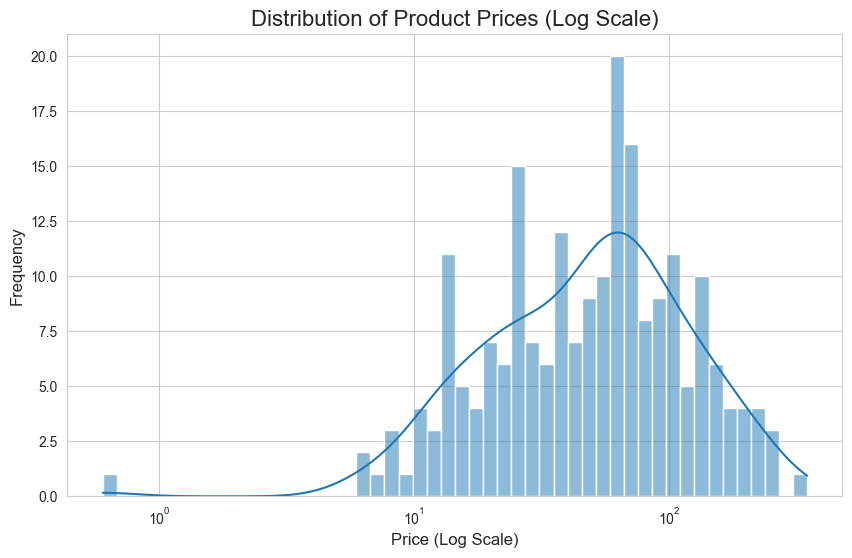

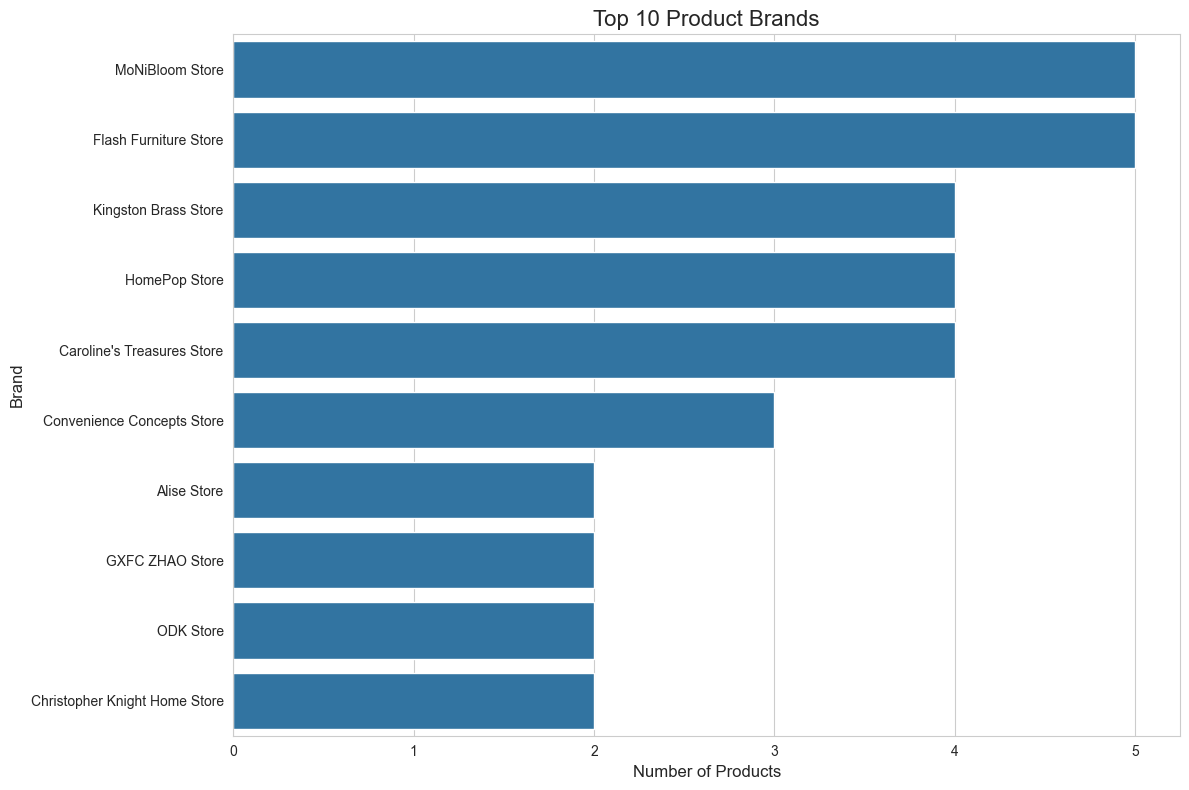

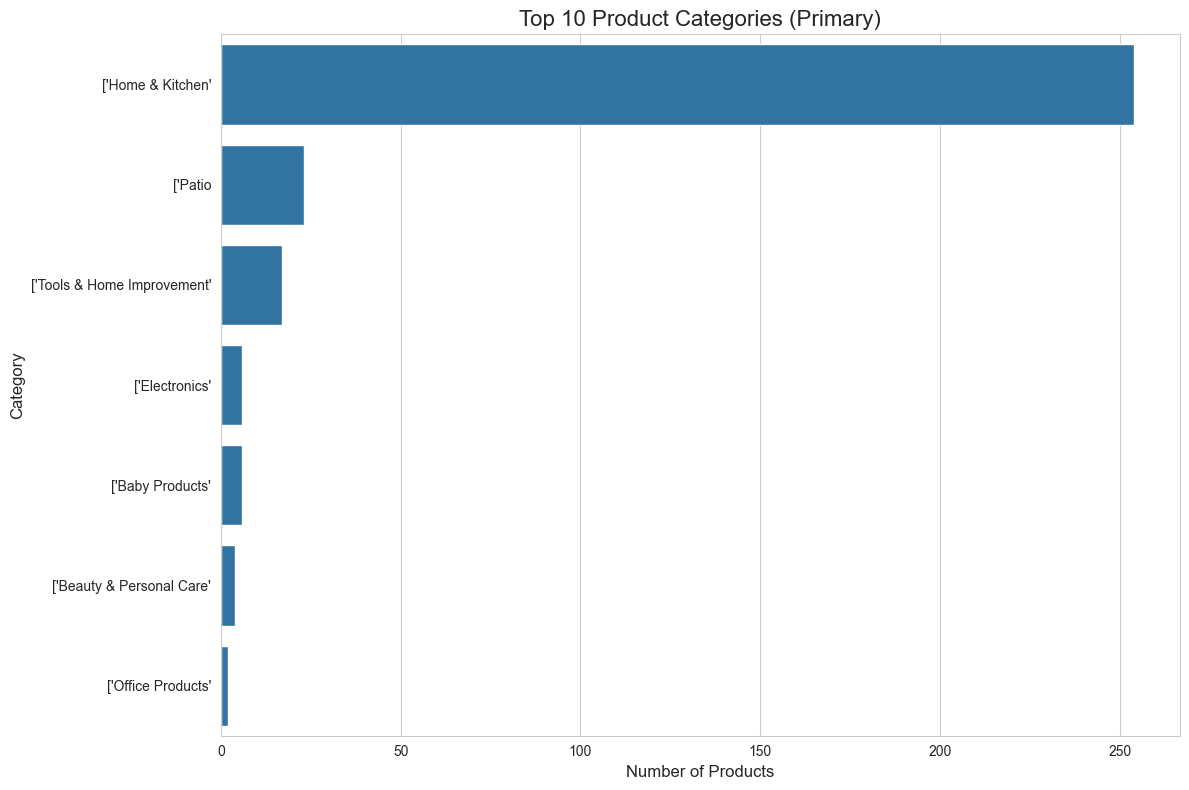

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re # Import the regular expression module

# --- Data Analytics Notebook (Corrected) ---

sns.set_style("whitegrid")

plot_dir = "analytics_plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
print(f"Plots will be saved to the '{plot_dir}' directory.")

try:
    df = pd.read_csv('intern_data_ikarus.csv')
    print("Dataset 'intern_data_ikarus.csv' loaded successfully!\n")

    # --- 1. General Statistics  ---
    print("--- General Dataset Information ---")
    print(df.info())
    
    # --- 2. Data Cleaning: Price Column ---
    print("\nCleaning 'price' column...")
    
    def clean_price(price):
        if isinstance(price, str):
            # Use regex to find all digits and the decimal point
            price_str = re.sub(r"[^0-9.]", "", price)
            if price_str:
                return float(price_str)
        return pd.NA # Return a 'Not Available' marker for missing values

    # Apply the cleaning function
    df['price_cleaned'] = df['price'].apply(clean_price)
    # Convert to numeric, forcing errors to NA
    df['price_cleaned'] = pd.to_numeric(df['price_cleaned'], errors='coerce')
    
    print("'price' column cleaned and converted to numeric.")
    print("\n--- Numerical Data Summary (Price, etc.) ---")
    print(df['price_cleaned'].describe())

    # --- 3. Price Distribution (Corrected) ---
    print("\nGenerating Price Distribution Plot...")
    plt.figure(figsize=(10, 6))
    
    # Plot the new 'price_cleaned' column
    sns.histplot(df['price_cleaned'].dropna(), bins=50, kde=True, log_scale=True)
    
    plt.title('Distribution of Product Prices (Log Scale)', fontsize=16)
    plt.xlabel('Price (Log Scale)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    price_plot_path = os.path.join(plot_dir, 'price_distribution.png')
    plt.savefig(price_plot_path)
    print(f"Saved price plot to '{price_plot_path}'")

    # --- 4. Top 10 Brands (No Change) ---
    print("\nGenerating Top 10 Brands Plot...")
    plt.figure(figsize=(12, 8))
    top_brands = df['brand'].value_counts().nlargest(10)
    sns.barplot(x=top_brands.values, y=top_brands.index)
    plt.title('Top 10 Product Brands', fontsize=16)
    plt.xlabel('Number of Products', fontsize=12)
    plt.ylabel('Brand', fontsize=12)
    plt.tight_layout()
    brand_plot_path = os.path.join(plot_dir, 'top_10_brands.png')
    plt.savefig(brand_plot_path)
    print(f"Saved top brands plot to '{brand_plot_path}'")

    # --- 5. Top 10 Categories (No Change) ---
    print("\nGenerating Top 10 Categories Plot...")
    df['categories_cleaned'] = df['categories'].fillna('Unknown').str.split(',').str[0]
    plt.figure(figsize=(12, 8))
    top_categories = df['categories_cleaned'].value_counts().nlargest(10)
    sns.barplot(x=top_categories.values, y=top_categories.index)
    plt.title('Top 10 Product Categories (Primary)', fontsize=16)
    plt.xlabel('Number of Products', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    category_plot_path = os.path.join(plot_dir, 'top_10_categories.png')
    plt.savefig(category_plot_path)
    print(f"Saved top categories plot to '{category_plot_path}'")
    
    print("\n--- Analytics script complete! ---")
    print("This notebook is now ready to be submitted as your Data Analytics Notebook.")

except FileNotFoundError:
    print("\n--- ERROR ---")
    print("The file 'intern_data_ikarus.csv' was not found.")
except Exception as e:
    print(f"\n--- AN ERROR OCCURRED ---")
    print(e)